# Project 2: 2-node network dataset
### Don Padmaperuma

1. Identify a large 2-node network dataset—you can start with a dataset in a repository. Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.  

2. Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.  

3. What can you infer about each of the distinct groups?

In [ ]:
import networkx as nx
import networkx.algorithms.bipartite as bi
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from operator import itemgetter
import triadic
import draw_triads
plt.figure(figsize=(15,10))
%matplotlib inline

# CEOs and Clubs
Two-mode network with 41 nodes and 98 edges. This data gives the affiliation network of 26 CEO's and their spouses of major corporations and banks in the Minneapolis area to 15 clubs, corporate and cultural boards. Membership was during the period 1978-1981.

# References
Galaskiewicz J (1985). Social Organization of an Urban Grants Economy. New York. Academic Press.

Wasserman S and K Faust (1994). Social Network Analysis: Methods and Applications.Cambridge University Press, Cambridge.

Source: https://networkdata.ics.uci.edu/netdata/html/ceos.html

# Load Data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/gpadmaperuma/DATA620/main/Project%202/ceo_net.csv")
df.head()

,CEO,club-1,club-2,club-3,club-4,club-5,club-6,club-7,club-8,club-9,club-10,club-11,club-12,club-13,club-14,club-15
0,CEO-1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
1,CEO-2,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
2,CEO-3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,CEO-4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
4,CEO-5,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0


In [ ]:
df_ceo = pd.melt(df, id_vars=["CEO"], var_name="CLUB", value_name="values")
df_ceo.set_index('CEO')
df_ceo[:5]

,CEO,CLUB,values
0,CEO-1,club-1,0
1,CEO-2,club-1,0
2,CEO-3,club-1,0
3,CEO-4,club-1,0
4,CEO-5,club-1,0


In [ ]:
# primary node set CEOs
ceos = df_ceo.CEO.unique()
ceos

array(['CEO-1', 'CEO-2', 'CEO-3', 'CEO-4', 'CEO-5', 'CEO-6', 'CEO-7',
       'CEO-8', 'CEO-9', 'CEO-10', 'CEO-11', 'CEO-12', 'CEO-13', 'CEO-14',
       'CEO-15', 'CEO-16', 'CEO-17', 'CEO-18', 'CEO-19', 'CEO-20',
       'CEO-21', 'CEO-22', 'CEO-23', 'CEO-24', 'CEO-25', 'CEO-26'],
      dtype=object)

In [ ]:
# secondary node set Clubs
clubs = df_ceo.CLUB.unique()
clubs

array(['club-1', 'club-2', 'club-3', 'club-4', 'club-5', 'club-6',
       'club-7', 'club-8', 'club-9', 'club-10', 'club-11', 'club-12',
       'club-13', 'club-14', 'club-15'], dtype=object)

In [ ]:
# I am only interested in the 1s in the dataset that shows the connection between CEOs and Clubs.
stacked = df.set_index('CEO').stack()
stacked = stacked[stacked==1]
stacked[:5]

CEO          
CEO-1  club-3    1
       club-4    1
       club-9    1
CEO-2  club-3    1
       club-5    1
dtype: int64

In [ ]:
# Create the edge list - connection between CEOs and Clubs
ceo_club_edgelist = stacked.index.tolist()
ceo_club_edgelist[:5]

[('CEO-1', 'club-3'),
 ('CEO-1', 'club-4'),
 ('CEO-1', 'club-9'),
 ('CEO-2', 'club-3'),
 ('CEO-2', 'club-5')]

# Analysis of the Network

In [ ]:
G = nx.Graph(ceo_club_edgelist)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 41
Number of edges: 98
Average degree:   4.7805


In [ ]:
deg = nx.degree(G)
deg_list = list(deg)
print("The maximum degree in the network is: "+ str (max(deg_list, key = itemgetter(1))[1]))
print("The minimum degree in the network is: "+ str (min(deg_list, key = itemgetter(1))[1]))

The maxmum degree in the network is: 21
The minimum degree in the network is: 2


# Network Graphs

## Graph of the entire network

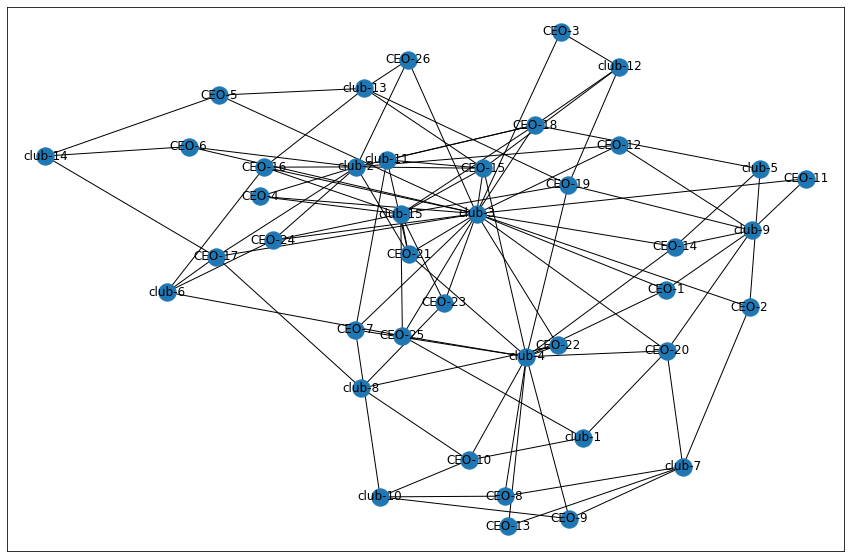

In [ ]:
# Entire network of the CEOs and Clubs
plt.figure(figsize=(15,10))
nx.draw_networkx(G)

## Graph of the Clubs

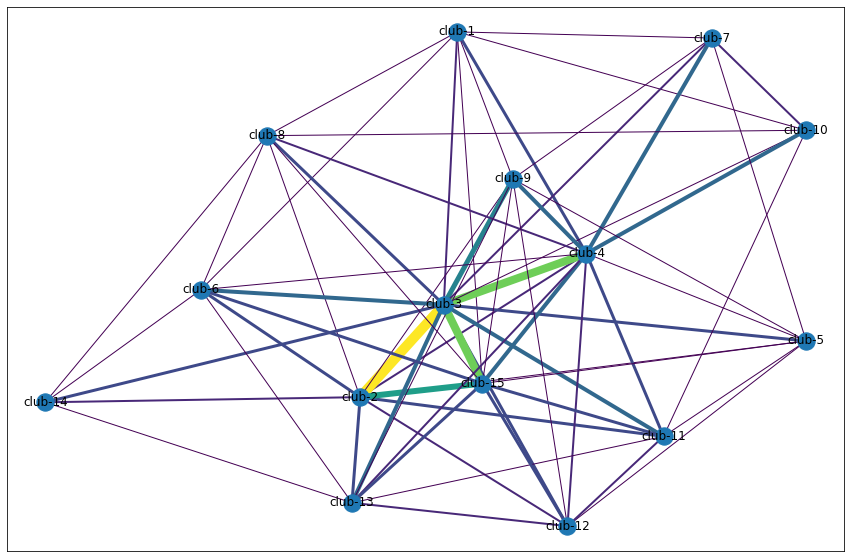

In [ ]:
club_graph = nx.bipartite.project(G, df.set_index('CEO').columns)
club_e = bi.weighted_projected_graph(G, club_graph, ratio=False)
weights = [edata['weight'] for f, t, edata in club_e.edges(data=True)]
plt.figure(figsize=(15,10))
nx.draw_networkx(club_e, width=weights, edge_color=weights) 

## Degree Centrality of Clubs


In [ ]:
# Degree of clubs (Number of edges adjacent to each node)
def sort_x(x):
  sort = sorted(x.items(), key=lambda kv: (-kv[1], kv[0]))
  return sort

club_deg = nx.degree(club_graph)
club_deg = {k:round(v,1) for k, v in (club_deg)}
club_deg = sort_x(club_deg)
club_deg

[('club-3', 14),
 ('club-4', 13),
 ('club-15', 11),
 ('club-2', 11),
 ('club-13', 9),
 ('club-9', 9),
 ('club-1', 8),
 ('club-11', 8),
 ('club-12', 8),
 ('club-5', 8),
 ('club-6', 8),
 ('club-8', 8),
 ('club-10', 6),
 ('club-7', 6),
 ('club-14', 5)]

In [ ]:
# Center
print("Center: ", nx.center(club_graph))
# Diameter
print("Diameter: ", nx.diameter(club_graph))
# Radius
print("Radius: ", nx.radius(club_graph))

Center:  ['club-3']
Diameter:  2
Radius:  1


## Graph of CEOs

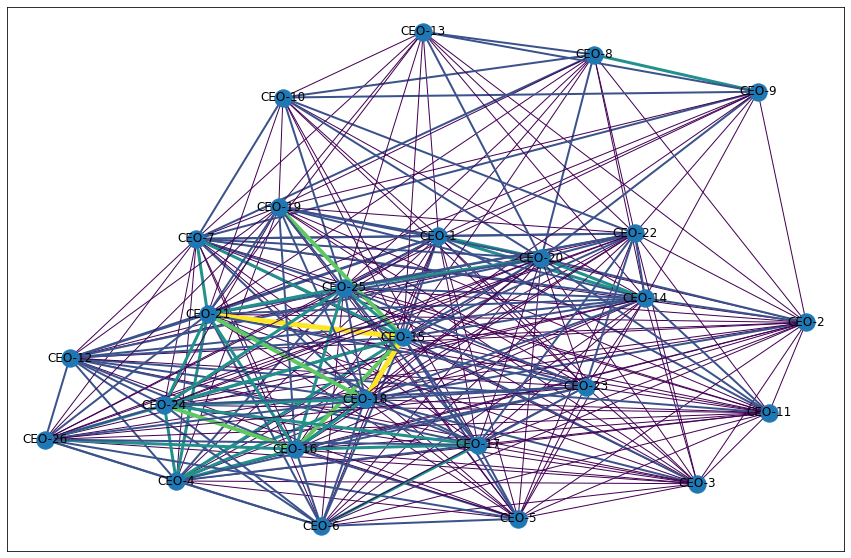

In [ ]:
ceo_graph = nx.bipartite.project(G, df.set_index('CEO').index)
ceo_e = bi.weighted_projected_graph(G, ceo_graph, ratio=False)
weights = [edata['weight'] for f, t, edata in ceo_e.edges(data=True)]
plt.figure(figsize=(15,10))
nx.draw_networkx(ceo_e, width=weights, edge_color=weights) 

## Degree Centrality of CEOs

In [ ]:
# Degree of CEOs
def sort_x(x):
  sort = sorted(x.items(), key=lambda kv: (-kv[1], kv[0]))
  return sort

ceo_deg = nx.degree(ceo_graph)
ceo_deg = {k:round(v,1) for k, v in (ceo_deg)}
ceo_deg = sort_x(ceo_deg)
ceo_deg

[('CEO-1', 25),
 ('CEO-14', 25),
 ('CEO-15', 25),
 ('CEO-20', 25),
 ('CEO-21', 25),
 ('CEO-22', 25),
 ('CEO-25', 25),
 ('CEO-7', 25),
 ('CEO-2', 23),
 ('CEO-19', 22),
 ('CEO-23', 22),
 ('CEO-11', 21),
 ('CEO-12', 21),
 ('CEO-16', 21),
 ('CEO-17', 21),
 ('CEO-18', 21),
 ('CEO-24', 21),
 ('CEO-26', 21),
 ('CEO-3', 21),
 ('CEO-4', 21),
 ('CEO-5', 21),
 ('CEO-6', 20),
 ('CEO-10', 14),
 ('CEO-13', 13),
 ('CEO-8', 13),
 ('CEO-9', 13)]

In [ ]:
# Center
print("Center: ", nx.center(ceo_graph))
# Diameter
print("Diameter: ", nx.diameter(ceo_graph))
# Radius
print("Radius: ", nx.radius(ceo_graph))

Center:  ['CEO-1', 'CEO-7', 'CEO-14', 'CEO-15', 'CEO-20', 'CEO-21', 'CEO-22', 'CEO-25']
Diameter:  2
Radius:  1


# CEOs with Island Method


In [ ]:
def trim_edges(g, weight = 1):
  # timming of the graph edges for the island analysis
  edges = []
  g2 = nx.Graph()
  for f, to, edata in g.edges(data=True):
    if edata['weight']> weight:
      x = float(edata['weight'])
      edges.append((f, to, x))

  g2.add_weighted_edges_from(edges)
  return g2

def island_method(g, iterations = 4):
  weights = [edata['weight'] for f, to, edata in g.edges(data=True)]
  mn = int(min(weights))
  mx = int(max(weights))
  step = int((mx-mn)/iterations)
  return [[threshold, trim_edges(g,threshold)] for threshold in range(mn, mx, step)]
  

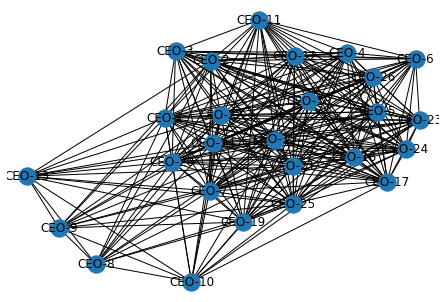

In [ ]:
# Build the graph from node set and edges
# set bipartite attribute to ensure weighted projection will work

ceo_nodes = list(df_ceo['CEO'].unique())
club_nodes = list(df_ceo['CLUB'].unique())

g = nx.Graph()
g.add_nodes_from(ceo_nodes, node_type="CEO", bipartite = 0)
g.add_nodes_from(club_nodes, node_type="CLUB", bipartite = 1)
g.add_edges_from(ceo_club_edgelist)

l = bi.weighted_projected_graph(g, ceo_nodes)
pos = nx.spring_layout(l)
nx.draw(l, pos = pos, with_labels=True)

In [ ]:
A = (l.subgraph(c) for c in nx.connected_components(l))
A = list(A)[0]
print(nx.info(A))
islands = island_method(l)

Name: 
Type: Graph
Number of nodes: 26
Number of edges: 275
Average degree:  21.1538


In [ ]:
print("Threshold, Node/Size, Edges, # of Connected Components")
for i in islands:
  print(i[0], nx.number_of_nodes(i[1]), nx.number_of_edges(i[1]), nx.number_connected_components(i[1]), nx.degree_centrality(i[1]))

Threshold, Node/Size, Edges, # of Connected Components
1 26 128 1 {'CEO-1': 0.4, 'CEO-7': 0.44, 'CEO-19': 0.32, 'CEO-11': 0.16, 'CEO-22': 0.4, 'CEO-25': 0.6, 'CEO-14': 0.48, 'CEO-20': 0.6, 'CEO-15': 0.76, 'CEO-12': 0.52, 'CEO-21': 0.68, 'CEO-2': 0.12, 'CEO-18': 0.64, 'CEO-3': 0.08, 'CEO-4': 0.44, 'CEO-16': 0.52, 'CEO-26': 0.4, 'CEO-17': 0.52, 'CEO-23': 0.36, 'CEO-24': 0.44, 'CEO-6': 0.4, 'CEO-5': 0.2, 'CEO-9': 0.2, 'CEO-8': 0.2, 'CEO-10': 0.24, 'CEO-13': 0.12}
2 17 32 2 {'CEO-1': 0.125, 'CEO-14': 0.125, 'CEO-20': 0.1875, 'CEO-4': 0.3125, 'CEO-16': 0.5, 'CEO-18': 0.3125, 'CEO-15': 0.5625, 'CEO-24': 0.4375, 'CEO-21': 0.4375, 'CEO-6': 0.0625, 'CEO-17': 0.1875, 'CEO-7': 0.125, 'CEO-8': 0.0625, 'CEO-9': 0.0625, 'CEO-19': 0.0625, 'CEO-26': 0.125, 'CEO-25': 0.3125}
3 6 6 1 {'CEO-15': 0.8, 'CEO-19': 0.2, 'CEO-16': 0.4, 'CEO-18': 0.4, 'CEO-21': 0.4, 'CEO-24': 0.2}
4 3 2 1 {'CEO-15': 1.0, 'CEO-18': 0.5, 'CEO-21': 0.5}


Above can be interpreted as at a threshold of 1 there are 26 nodes, at a threshold of 2 there are 17 nodes, at a threshold of 3 there are 6 nodes and at a threshold of 4 there are 3 nodes. CEO-15 has the highest degree centrality. 

## Analyse Threshold 1

In [ ]:
islands[0]
islands_l = islands [0][1]

In [ ]:
census, node_census = triadic.triadic_census(islands_l)

In [ ]:
census

{'003': 624.0,
 '012': 0,
 '021C': 0,
 '021D': 0,
 '021U': 0,
 '030C': 0,
 '030T': 0,
 '102': 1188,
 '111D': 0,
 '111U': 0,
 '120C': 0,
 '120D': 0,
 '120U': 0,
 '201': 480,
 '210': 0,
 '300': 308}

In [ ]:
# Get only the number of closed triads, and sort by the value in decending order
closed_triads = [[-k,v] for k, v in sorted([[-node_census[k] ['300'], k] for k in node_census.keys()])]
closed_triads

[[47, 'CEO-15'],
 [35, 'CEO-25'],
 [33, 'CEO-1'],
 [28, 'CEO-12'],
 [27, 'CEO-7'],
 [26, 'CEO-21'],
 [19, 'CEO-18'],
 [19, 'CEO-22'],
 [18, 'CEO-19'],
 [13, 'CEO-4'],
 [11, 'CEO-14'],
 [11, 'CEO-16'],
 [8, 'CEO-20'],
 [5, 'CEO-26'],
 [3, 'CEO-11'],
 [3, 'CEO-17'],
 [2, 'CEO-9'],
 [0, 'CEO-10'],
 [0, 'CEO-13'],
 [0, 'CEO-2'],
 [0, 'CEO-23'],
 [0, 'CEO-24'],
 [0, 'CEO-3'],
 [0, 'CEO-5'],
 [0, 'CEO-6'],
 [0, 'CEO-8']]

In [ ]:
cliques = list(nx.find_cliques(islands_l))
len(cliques)

18

In [ ]:
cliques

[['CEO-9', 'CEO-20', 'CEO-8', 'CEO-7', 'CEO-10'],
 ['CEO-9', 'CEO-20', 'CEO-8', 'CEO-13'],
 ['CEO-10', 'CEO-7', 'CEO-20', 'CEO-22', 'CEO-25'],
 ['CEO-2', 'CEO-14', 'CEO-20'],
 ['CEO-2', 'CEO-14', 'CEO-18'],
 ['CEO-15',
  'CEO-21',
  'CEO-22',
  'CEO-25',
  'CEO-7',
  'CEO-20',
  'CEO-1',
  'CEO-14'],
 ['CEO-15', 'CEO-21', 'CEO-22', 'CEO-25', 'CEO-23', 'CEO-17'],
 ['CEO-15', 'CEO-21', 'CEO-20', 'CEO-14', 'CEO-1', 'CEO-19', 'CEO-25'],
 ['CEO-15', 'CEO-21', 'CEO-20', 'CEO-14', 'CEO-1', 'CEO-12'],
 ['CEO-15', 'CEO-21', 'CEO-18', 'CEO-7', 'CEO-25', 'CEO-14'],
 ['CEO-15', 'CEO-21', 'CEO-18', 'CEO-16', 'CEO-19', 'CEO-25'],
 ['CEO-15',
  'CEO-21',
  'CEO-18',
  'CEO-16',
  'CEO-17',
  'CEO-4',
  'CEO-24',
  'CEO-23',
  'CEO-25'],
 ['CEO-15',
  'CEO-21',
  'CEO-18',
  'CEO-16',
  'CEO-17',
  'CEO-4',
  'CEO-24',
  'CEO-12',
  'CEO-26',
  'CEO-6'],
 ['CEO-15', 'CEO-21', 'CEO-18', 'CEO-14', 'CEO-19', 'CEO-25'],
 ['CEO-15', 'CEO-21', 'CEO-18', 'CEO-14', 'CEO-12'],
 ['CEO-15', 'CEO-5', 'CEO-26', 'C

## What can you infer about the distinct groups?

1. We found out earlier in the code that Club-3 as the center of the graphs where as for CEOs there are few center of the CEOs ['CEO-1', 'CEO-7', 'CEO-14', 'CEO-15', 'CEO-20', 'CEO-21', 'CEO-22', 'CEO-25'].

2. When the threshold is increasing the number of nodes get reduced.

3. We see that cliques of CEOs: CEO-15, CEO-21 and CEO-18 has created the most of the network.